# Chapter 8 Homework problems 2, 3, 4, 6, 7, 9, 12, 15
## Note: For the animations to work properly often requires a kernel restart. Utilizing the Kernel -> Restart and Run All
## 8.2: Lotka-Volterra Equations

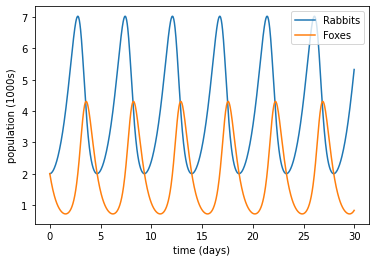

In [4]:
"""
Solving Lotka-Volterra equations
"""
##############################################################################
## Copy/Paste of odesim.py from cpresources for convenience
from numpy import array,arange
from pylab import plot,xlabel,ylabel,show,legend

a = 0.0
b = 30.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []
def rk4(f,r):
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    plot(tpoints,xpoints,label='Rabbits')
    plot(tpoints,ypoints,label='Foxes')
    ylabel("population (1000s)")
    xlabel("time (days)")
    legend()
    show()


###############################################################################
# Initializing configurable constants

alpha = 1
beta = 0.5
gamma = 0.5
delta = 2
x0 = 2
y0 = 2

def f(r,t):
    '''
    Simultaneous equations for the pops of rabbits and foxes
    '''
    x = r[0]
    y = r[1]
    fx = alpha * x - beta * x * y
    fy = gamma * x * y - delta * y
    return(array([fx,fy],float))
    
r = array([ x0, y0],float)
rk4(f,r)

## 8.2 b.

As can be seen in the graph above, the two populations are locked in a cyclic behavior where the rabbit population will explode and thus can feed a larger fox population. The fox population explodes and then culls the rabbit population so much that foxes no longer have enough food to survive and begin to die off. A lower fox population allows for a larger rabbit population. Ad infinitum


## 8.3: Lorenz Equations

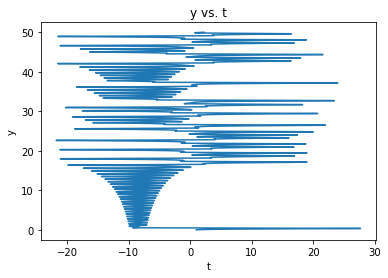

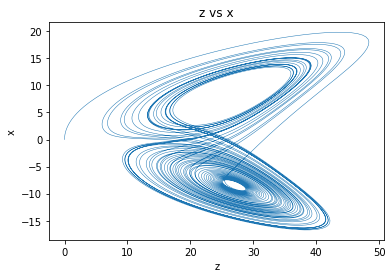

In [5]:
"""
Solving Lorenz equations
"""
##############################################################################
## Copy/Paste of odesim.py from cpresources for convenience
from numpy import array,arange
from pylab import plot,xlabel,ylabel,show,title

a = 0.0
b = 50.0
N = 10000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []
zpoints = []
def rk4(f,r):
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        zpoints.append(r[2])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    # Part a #
    plot(ypoints,tpoints)
    title('y vs. t')
    ylabel('y')
    xlabel('t')
    show()    
        
    # Part b #
    plot(zpoints,xpoints,linewidth='0.5')
    title('z vs x')
    ylabel('x')
    xlabel('z')
    show()


###############################################################################
# Initializing configurable constants

sigma = 10
r_f = 28
b_f = 8/3

x0 = 0
y0 = 1
z0 = 0
def f(r,t):
    '''
    Lorenz equations
    '''
    x = r[0]
    y = r[1]
    z = r[2]
    fx = sigma*(y - x)
    fy = r_f*x - y - x*z
    fz = x*y - b_f*z
    return(array([fx,fy,fz],float))
    
r = [ x0, y0, z0]
rk4(f,r)

## 8.4: The nonlinear pendulum

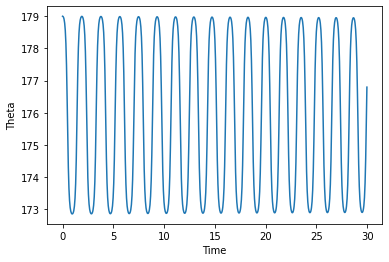

In [6]:
"""
Solving the nonlinear pendulum
Part A
"""

##############################################################################
## Copy/Paste of odesim.py from cpresources for convenience
from numpy import array,arange,sin
from pylab import plot,xlabel,ylabel,show

a = 0.0
b = 30.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
theta_points = []
omega_points = []
def rk4(f,r):
    for t in tpoints:
        theta_points.append(r[0])
        omega_points.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    plot(tpoints,theta_points)
    ylabel("Theta")
    xlabel("Time")
    show()
    

###############################################################################
# Initializing configurable constants

g = 9.81
l = 0.1

theta0 = 179
omega0 = 0

def f(r,t):
    '''
    Simultaneous equations for theta and omega
    '''
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*sin(theta)
    return(array([ftheta,fomega],float))
    
r = array([ theta0, omega0],float)
rk4(f,r)

In [7]:
"""
Solving the nonlinear pendulum
Part B
"""
from numpy import array,arange,sin,cos,pi
from vpython import cylinder, vector, sphere, rate, scene, canvas
##############################################################################
## Copy/Paste of odesim.py from cpresources for convenience

g = 9.81
theta0 = 179
omega0 = 0
l = 0.1
r = [theta0, omega0]

a = 0.0
b = 30.0
N = 1800
h = (b-a)/N

tpoints = arange(a,b,h)
theta_points = []
omega_points = []
def rk4(f,r):
    for t in tpoints:
        theta_points.append(r[0])
        omega_points.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    return(theta_points,tpoints)

###############################################################################
def f(r,t):
    '''
    Simultaneous equations for theta and omega
    '''
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*sin(theta)
    return(array([ftheta,fomega],float))

theta_points, tpoints = rk4(f,r)
# make animation
scene = canvas(title="Pendulum")
rod = cylinder(pos=vector(0, 0, 0), axis=vector(l * cos(theta0 - pi / 2), l * sin(theta0 - pi / 2), 0), radius=l/40)
bob = sphere(pos=vector(l * cos(theta0 - pi / 2), l * sin(theta0 - pi / 2), 0), radius=l/10)
for theta in theta_points:
    rate(N // b)
    rod.axis = vector(l * cos(theta - pi / 2), l * sin(theta - pi / 2), 0)
    bob.pos = vector(l * cos(theta - pi / 2), l * sin(theta - pi / 2), 0)

<IPython.core.display.Javascript object>

## 8.6: Harmonic and anharmonic oscillators

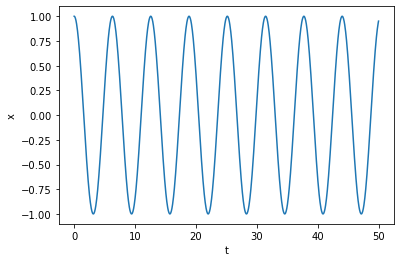

In [8]:
"""
Solving Harmonic and anharmonic oscillators
Part A
"""
##############################################################################
## Copy/Paste of odesim.py from cpresources for convenience
from numpy import array,arange
from pylab import plot,xlabel,ylabel,show,legend

a = 0.0
b = 50.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []
def rk4(f,r):
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    plot(tpoints,xpoints)
    ylabel("x")
    xlabel("t")
    show()


###############################################################################
# Initializing configurable constants

x0 = 1
y0 = 0
omega = 1

def f(r,t):
    x = r[0]
    y = r[1]
    fx = y
    fy = -omega**2 * x
    return(array([fx,fy],float))

r = array([ x0, y0],float)
rk4(f,r)

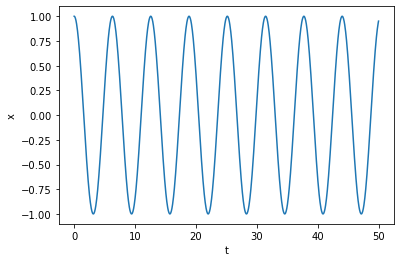

In [9]:
"""
Solving Harmonic and anharmonic oscillators
Part B
"""
##############################################################################
## Copy/Paste of odesim.py from cpresources for convenience
from numpy import array,arange
from pylab import plot,xlabel,ylabel,show,legend

a = 0.0
b = 50.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []
def rk4(f,r):
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    plot(tpoints,xpoints)
    ylabel("x")
    xlabel("t")
    show()


###############################################################################
# Initializing configurable constants

x0 = 1
y0 = 0
omega = 1

def f(r,t):
    x = r[0]
    y = r[1]
    fx = y
    fy = -omega**2 * x
    return(array([fx,fy],float))

r = array([ x0, y0],float)
rk4(f,r)

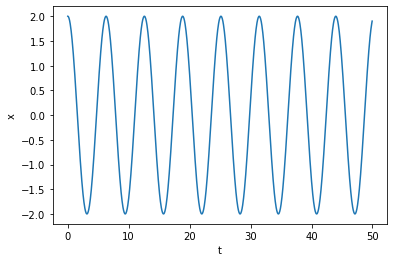

In [10]:
"""
Solving Harmonic and anharmonic oscillators
Part C
"""
##############################################################################
## Copy/Paste of odesim.py from cpresources for convenience
from numpy import array,arange
from pylab import plot,xlabel,ylabel,show,legend

a = 0.0
b = 50.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []
def rk4(f,r):
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    plot(tpoints,xpoints)
    ylabel("x")
    xlabel("t")
    show()


###############################################################################
# Initializing configurable constants

x0 = 2
y0 = 0
omega = 1

def f(r,t):
    x = r[0]
    y = r[1]
    fx = y
    fy = -omega**2 * x
    return(array([fx,fy],float))

r = array([ x0, y0],float)
rk4(f,r)

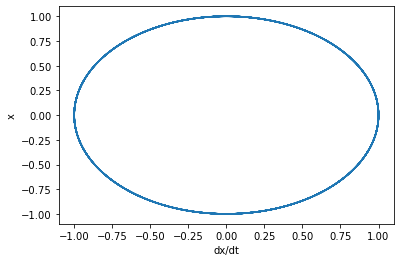

In [11]:
"""
Solving Harmonic and anharmonic oscillators
Part D
"""
##############################################################################
## Copy/Paste of odesim.py from cpresources for convenience
from numpy import array,arange
from pylab import plot,xlabel,ylabel,show,legend

a = 0.0
b = 50.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []
def rk4(f,r):
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    plot(ypoints,xpoints)
    ylabel("x")
    xlabel("dx/dt")
    show()


###############################################################################
# Initializing configurable constants

x0 = 1
y0 = 0
omega = 1

def f(r,t):
    x = r[0]
    y = r[1]
    fx = y
    fy = -omega**2 * x
    return(array([fx,fy],float))

r = array([ x0, y0],float)
rk4(f,r)

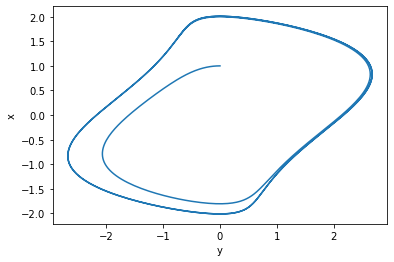

In [12]:
"""
Solving Harmonic and anharmonic oscillators
Part E: The van der Pol oscillator
"""
##############################################################################
## Copy/Paste of odesim.py from cpresources for convenience
from numpy import array,arange
from pylab import plot,xlabel,ylabel,show,legend

a = 0.0
b = 20.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []
def rk4(f,r):
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    plot(ypoints,xpoints)
    ylabel("x")
    xlabel("y")
    show()


###############################################################################
# Initializing configurable constants

x0 = 1
y0 = 0
omega = 1
mu = 1

def f(r,t):
    x = r[0]
    y = r[1]
    fx = y
    fy = mu*(1 - x**2)*y - omega**2*x
    return(array([fx,fy],float))

r = array([ x0, y0],float)
rk4(f,r)

## 8.7: Trajectory with air resistance

Starting with the total force on an object with air resistance, the equation for force is:
$$  F = -\pi/2 R^2 \rho C v^2 - mg $$
The x and y components of force are:
$$ F_x = -\pi/2 R^2 \rho C v_x^2 $$
and
$$ F_y = -\pi/2 R^2 \rho C v_y^2 - mg $$
Now, noting that the total velocity vector is simply the combination of the x and y components of the total vector, the velocity vector can be written as such:
$$ \vec{v} = v_x \hat{x} + v_y \hat{y} $$
Where, for example, the x component of velocity is: $ \dot{x} = v_x \hat{x} $
In this case, the expected result will be the $v_x$ value. So, solving for this requires the followng simple vector manipulation:
$$ \vec{v} \cdot \dot{x} = v_x^2 $$
$$ \vec{v} \cdot \dot{x} = |\vec{v}||\dot{x}| $$
$$ v_x^2 = \dot{x} \sqrt{\dot{x}^2 + \dot{y}^2} $$
Using the same sort of logic with the y component, the force equations become as follows:
$$ F_x = -\pi/2 R^2 \rho C \dot{x} \sqrt{\dot{x}^2 + \dot{y}^2} $$
$$ F_y = -\pi/2 R^2 \rho C \dot{y} \sqrt{\dot{x}^2 + \dot{y}^2} - mg $$
Using $ \vec{F} = m \vec{a} $ and solving results in the expected equations:
$$ \ddot{x} = \frac{-\pi R^2}{2m} \rho C \dot{x} \sqrt{\dot{x}^2 + \dot{y}^2} $$
$$ \ddot{y} = \frac{-\pi R^2}{2m} \rho C \dot{y} \sqrt{\dot{x}^2 + \dot{y}^2} - mg $$

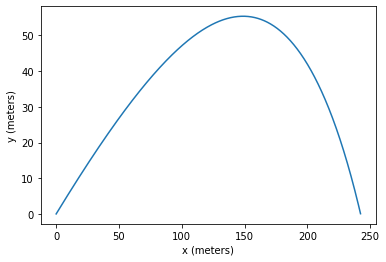

The total airborne time is: 6.58 seconds


In [13]:
"""
Solving trajectory equations
"""
##############################################################################
## Copy/Paste of odesim.py from cpresources for convenience
from numpy import array,arange,sin,cos,pi
from pylab import plot,xlabel,ylabel,show,legend,title
from math import sqrt
a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
Xpoints = []
ypoints = []
Ypoints = []
def rk4(f,r):
    for t in tpoints:
        xpoints.append(r[0])
        Xpoints.append(r[1])
        ypoints.append(r[2])
        Ypoints.append(r[3])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
        if r[2] <= 0.0:
            break
    plot(xpoints,ypoints)
    ylabel("y (meters)")
    xlabel("x (meters)")
    show()
    print(f'The total airborne time is: {t} seconds')


###############################################################################
# Initializing configurable constants
# x,y = position, X,Y = velocity
x0 = 0
X0 = 0
y0 = 0
Y0 = 0
rho = 1.22
C = 0.47
R = .08
m = 1
g = 9.81

v0 = 100
thta = 30 * pi/180
# Break v0 into X0,Y0
X0 = v0*cos(thta)
Y0 = v0*sin(thta)
k = pi*R**2*rho*C/(2*m)
def f(r,t):
    x = r[0]
    X = r[1]
    y = r[2]
    Y = r[3]
    fx = X
    fX = -k*X*sqrt(X**2+Y**2)
    fy = Y
    fY = -g - k*Y*sqrt(X**2+Y**2)
    return(array([fx,fX,fy,fY],float))

r = array([ x0, X0, y0, Y0],float)
rk4(f,r)

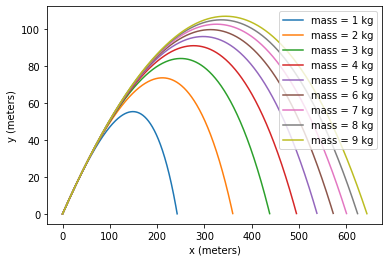

Larger masses tend to have a farther trajectory than smaller masses


In [14]:
"""
Solving trajectory equations
Part C
"""
##############################################################################
## Copy/Paste of odesim.py from cpresources for convenience
from numpy import array,arange,sin,cos,pi
from pylab import plot,xlabel,ylabel,show,legend,title
from math import sqrt
a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
Xpoints = []
ypoints = []
Ypoints = []
def rk4(f,r):
    for t in tpoints:
        xpoints.append(r[0])
        Xpoints.append(r[1])
        ypoints.append(r[2])
        Ypoints.append(r[3])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
        if r[2] <= 0.0:
            break
    return(xpoints,ypoints)
'''
    plot(xpoints,ypoints)
    ylabel("y (meters)")
    xlabel("x (meters)")
    show()
    print(f'The total airborne time is: {t} seconds')
'''

###############################################################################
# Initializing configurable constants
# x,y = position, X,Y = velocity
x0 = 0
X0 = 0
y0 = 0
Y0 = 0
rho = 1.22
C = 0.47
R = .08
m = 1
g = 9.81

v0 = 100
thta = 30 * pi/180
# Break v0 into X0,Y0
X0 = v0*cos(thta)
Y0 = v0*sin(thta)
k = pi*R**2*rho*C/(2*m)
def f(r,t):
    x = r[0]
    X = r[1]
    y = r[2]
    Y = r[3]
    fx = X
    fX = - k*X*sqrt(X**2+Y**2)
    fy = Y
    fY = - g - k*Y*sqrt(X**2+Y**2)
    return(array([fx,fX,fy,fY],float))

r = array([ x0, X0, y0, Y0],float)
#rk4(f,r)
testmass = arange(1,10,1)
for mass in testmass:
    m = mass
    k = pi*R**2*rho*C/(2*m)
    r = array([ x0, X0, y0, Y0],float)
    xpoints = []
    Xpoints = []
    ypoints = []
    Ypoints = []
    xpoints,ypoints = rk4(f,r)
    plot(xpoints,ypoints,label=f'mass = {m} kg')
ylabel("y (meters)")
xlabel("x (meters)")
legend()
show()
message = 'Larger masses tend to have a farther trajectory than smaller masses'
print(message)

## 8.9: Vibration in a one-dimensional system

In [15]:
from numpy import array, arange, cos, zeros, empty,copy
from pylab import plot, show, xlabel, ylabel
from vpython import sphere, vector, rate

# Constants
m = 1  # mass
k = 6  # spring constant
N = 5  # number of masses
omega = 2
t_0 = 0.0
t_f = 20.0
n = 10000
h = (t_f - t_0) / n

# store the positions and velocities in a vector of length 2N, where the first N elements are the positions,
# and the last N are the corresponding velocities

def f(r, t):
    arr = empty(2 * N, float)
    for i in range(2 * N):
        if i < N:
            arr[i] = r[i + N]
        elif i == N:
            arr[i] =  k / m * (r[1] - r[0]) + 1 / m * cos(omega * t)
        elif i == 2 * N - 1:
            arr[2 * N - 1] = k / m * (r[N - 2] - r[N - 1])
        else:
            arr[i] = k / m * (r[i + 1 - N] - 2 * r[i - N] + r[i - 1 - N])
    return arr


tpoints = arange(t_0, t_f, h)
positions = []
r = zeros(2 * N, float)  # initial displacements and speeds = 0
for t in tpoints:
    positions.append(copy(r[0 : N]))
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Plot first mass
# plot(tpoints, array(positions,float)[:, 0])
# show()

# Make animation
scene = canvas(title='1D Springs')
spacing = 2
length = N * spacing
masses = empty(N, sphere)
for i in range(N):
    masses[i] = sphere(pos=vector(spacing * i - (length - spacing) / 2, 0, 0), radius = 0.1)

for j in range(len(positions)):
    rate(n//10)
    for i in range(N):
        masses[i].pos = vector(spacing * i - (length - spacing) / 2 + positions[j][i], 0, 0)

<IPython.core.display.Javascript object>

## 8.12: Orbit of the Earth

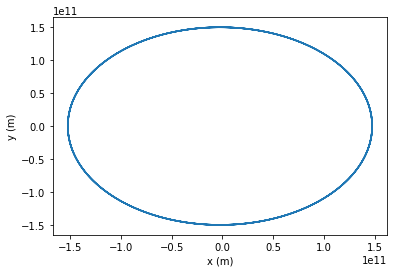

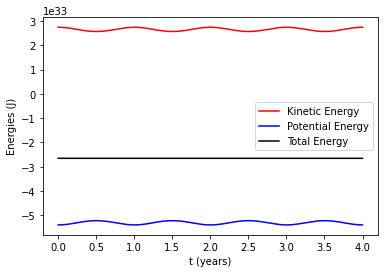

In [16]:
from numpy import array, arange, sqrt
from pylab import plot, show, xlabel, ylabel

# Constants
x_0 = 1.4710 * 10 ** 11
vx_0 = 0
y_0 = 0
vy_0 = 3.0287 * 10 ** 4 * 8760 * 60 * 60  # m/yr
t_0 = 0
t_f = 4  # year
h = 1 / 8760  # 1 hour in years
G = 6.6738 * 10 ** -11 * ( 8760 * 60 * 60) ** 2
M = 1.9891 * 10 ** 30  # mass of sun in kg
m = 5.9722 * 10 ** 24  # mass of earth in kg


def f(r):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    dist = sqrt(x ** 2 + y ** 2)
    return array([ vx, -G * M * x / dist ** 3, vy, -G * M * y / dist ** 3 ], float)


# Calculate orbit
tpoints = arange(t_0, t_f, h)
xpoints = []
ypoints = []
potential_E = []
kinetic_E = []
r = array([x_0, vx_0, y_0, vy_0], float)
f_mid = 0.5 * h * f(r)
vx_mid = r[1] + f_mid[1]
vy_mid = r[3] + f_mid[3]
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[2])
    potential_E.append(-6.6738 * 10 ** -11 * M * m / sqrt(r[0] ** 2 + r[2] ** 2))
    kinetic_E.append(0.5 * m * (r[1] ** 2 + r[3] ** 2) / (8760 * 60 * 60) ** 2)
    r[0] += h * vx_mid
    r[2] += h * vy_mid
    k = h * f(r)
    r[1] = vx_mid + 0.5 * k[1]
    r[3] = vy_mid + 0.5 * k[3]
    f_mid = 0.5 * h * f(r)
    vx_mid += k[1]
    vy_mid += k[3]


# Plot orbit
plot(xpoints, ypoints)
xlabel('x (m)')
ylabel('y (m)')
show()


# Plot energies
total_energy = array(kinetic_E, float) + array(potential_E, float)
plot(tpoints, kinetic_E, 'r',label='Kinetic Energy')
plot(tpoints, potential_E, 'b',label='Potential Energy')
plot(tpoints, total_energy, 'k',label='Total Energy')
xlabel('t (years)')
ylabel('Energies (J)')
legend()
show()

## 8.15: The double pendulum

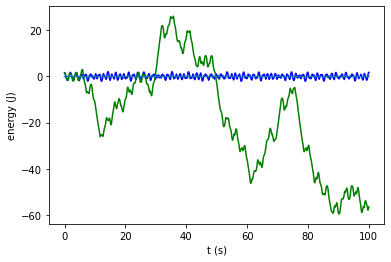

In [21]:
from numpy import array, arange, pi, sin, cos
from pylab import plot, show, xlabel, ylabel
from vpython import cylinder, vector, sphere, rate

# Constants
g = 9.81  # m/s^2
m = 1  # kg
l = 0.4  # pendulum lengths in m
theta1_0 = pi / 2
theta2_0 = pi / 2
omega1_0 = 0
omega2_0 = 0
t_0 = 0
t_f = 100
N = 75000
h = (t_f - t_0) / N


# Use fourth-order Runge-Kutta method to solve system
def f(r):
    theta1 = r[0]
    omega1 = r[1]
    theta2 = r[2]
    omega2 = r[3]
    f_omega1 = - (omega1 ** 2 * sin(2 * theta1 - 2 * theta2) + 2 * omega2 ** 2 * sin(theta1 - theta2) + \
                  g / l * (sin(theta1 - 2 * theta2) + 3 * sin(theta1))) / (3 - cos(2 * theta1 - 2 * theta2))
    f_omega2 = (4 * omega1 ** 2 * sin(theta1 - theta2) + omega2 ** 2 * sin(2 * theta1 - 2 * theta2) + \
                 2 * g / l * (sin(2 * theta1 - theta2) - sin(theta2))) / (3 - cos(2 * theta1 - 2 * theta2))
    return array([ omega1, f_omega1, omega2, f_omega2], float)


def energy(r):
    theta1 = r[0]
    omega1 = r[1]
    theta2 = r[2]
    omega2 = r[3]
    return - m * g * l * (2 * cos(theta1) + cos(theta2)) + \
           m * l ** 2 * (omega1 ** 2 + 0.5 * omega2 ** 2 + omega1 * omega2 * cos(theta1 - theta2))


r = array([theta1_0, omega1_0, theta2_0, omega2_0], float)
tpoints = arange(t_0, t_f, h)
theta1_points = []
theta2_points = []
energy_points = []
for t in tpoints:
    theta1_points.append(r[0])
    theta2_points.append(r[2])
    energy_points.append(energy(r))
    k1 = h * f(r)
    k2 = h * f(r + 0.5 * k1)
    k3 = h * f(r + 0.5 * k2)
    k4 = h * f(r + k3)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

plot(tpoints, theta1_points,'b')
plot(tpoints, theta2_points, 'g')
plot(tpoints, energy_points)
xlabel('t (s)')
ylabel('energy (J)')
show()


In [3]:
from numpy import array, arange, pi, sin, cos
from pylab import plot, show, xlabel, ylabel
from vpython import cylinder, vector, sphere, rate, canvas

# Constants
g = 9.81  # m/s^2
m = 1  # kg
l = 0.4  # pendulum lengths in m
theta1_0 = pi / 2
theta2_0 = pi / 2
omega1_0 = 0
omega2_0 = 0
t_0 = 0
t_f = 100
N = 75000
h = (t_f - t_0) / N


# Use fourth-order Runge-Kutta method to solve system
def f(r):
    theta1 = r[0]
    omega1 = r[1]
    theta2 = r[2]
    omega2 = r[3]
    f_omega1 = - (omega1 ** 2 * sin(2 * theta1 - 2 * theta2) + 2 * omega2 ** 2 * sin(theta1 - theta2) + \
                  g / l * (sin(theta1 - 2 * theta2) + 3 * sin(theta1))) / (3 - cos(2 * theta1 - 2 * theta2))
    f_omega2 = (4 * omega1 ** 2 * sin(theta1 - theta2) + omega2 ** 2 * sin(2 * theta1 - 2 * theta2) + \
                 2 * g / l * (sin(2 * theta1 - theta2) - sin(theta2))) / (3 - cos(2 * theta1 - 2 * theta2))
    return array([ omega1, f_omega1, omega2, f_omega2], float)


def energy(r):
    theta1 = r[0]
    omega1 = r[1]
    theta2 = r[2]
    omega2 = r[3]
    return - m * g * l * (2 * cos(theta1) + cos(theta2)) + \
           m * l ** 2 * (omega1 ** 2 + 0.5 * omega2 ** 2 + omega1 * omega2 * cos(theta1 - theta2))


r = array([theta1_0, omega1_0, theta2_0, omega2_0], float)
tpoints = arange(t_0, t_f, h)
theta1_points = []
theta2_points = []
energy_points = []
for t in tpoints:
    theta1_points.append(r[0])
    theta2_points.append(r[2])
    energy_points.append(energy(r))
    k1 = h * f(r)
    k2 = h * f(r + 0.5 * k1)
    k3 = h * f(r + 0.5 * k2)
    k4 = h * f(r + k3)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
# Make animation
scene = canvas(title='Double Pendulum')
rod1 = cylinder(pos=vector(0, 0, 0), axis=vector(l * cos(theta1_0 - pi / 2), l * sin(theta1_0 - pi / 2), 0), radius=l/40)
bob1 = sphere(pos=vector(l * cos(theta1_0 - pi / 2), l * sin(theta1_0 - pi / 2), 0), radius=l/10)
rod2 = cylinder(pos=vector(l * cos(theta1_0 - pi / 2), l * sin(theta1_0 - pi / 2), 0), \
                axis=vector(l * cos(theta2_0 - pi / 2), l * sin(theta2_0 - pi / 2), 0), radius=l/40)
bob2 = sphere(pos=vector(l * cos(theta2_0 - pi / 2), l * sin(theta2_0 - pi / 2), 0), radius=l/10)

for i in range(N):
    rate(N // 100)
    vector1 = vector(l * cos(theta1_points[i] - pi / 2), l * sin(theta1_points[i] - pi / 2), 0)
    vector2 = vector(l * cos(theta2_points[i] - pi / 2), l * sin(theta2_points[i] - pi / 2), 0)
    rod1.axis = vector1
    bob1.pos = vector1
    rod2.pos = vector1
    rod2.axis = vector2
    bob2.pos = vector1 + vector2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>